<a href="https://colab.research.google.com/github/shaanvithabandewar/data_science_assignmets/blob/main/assignment_16_knn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  


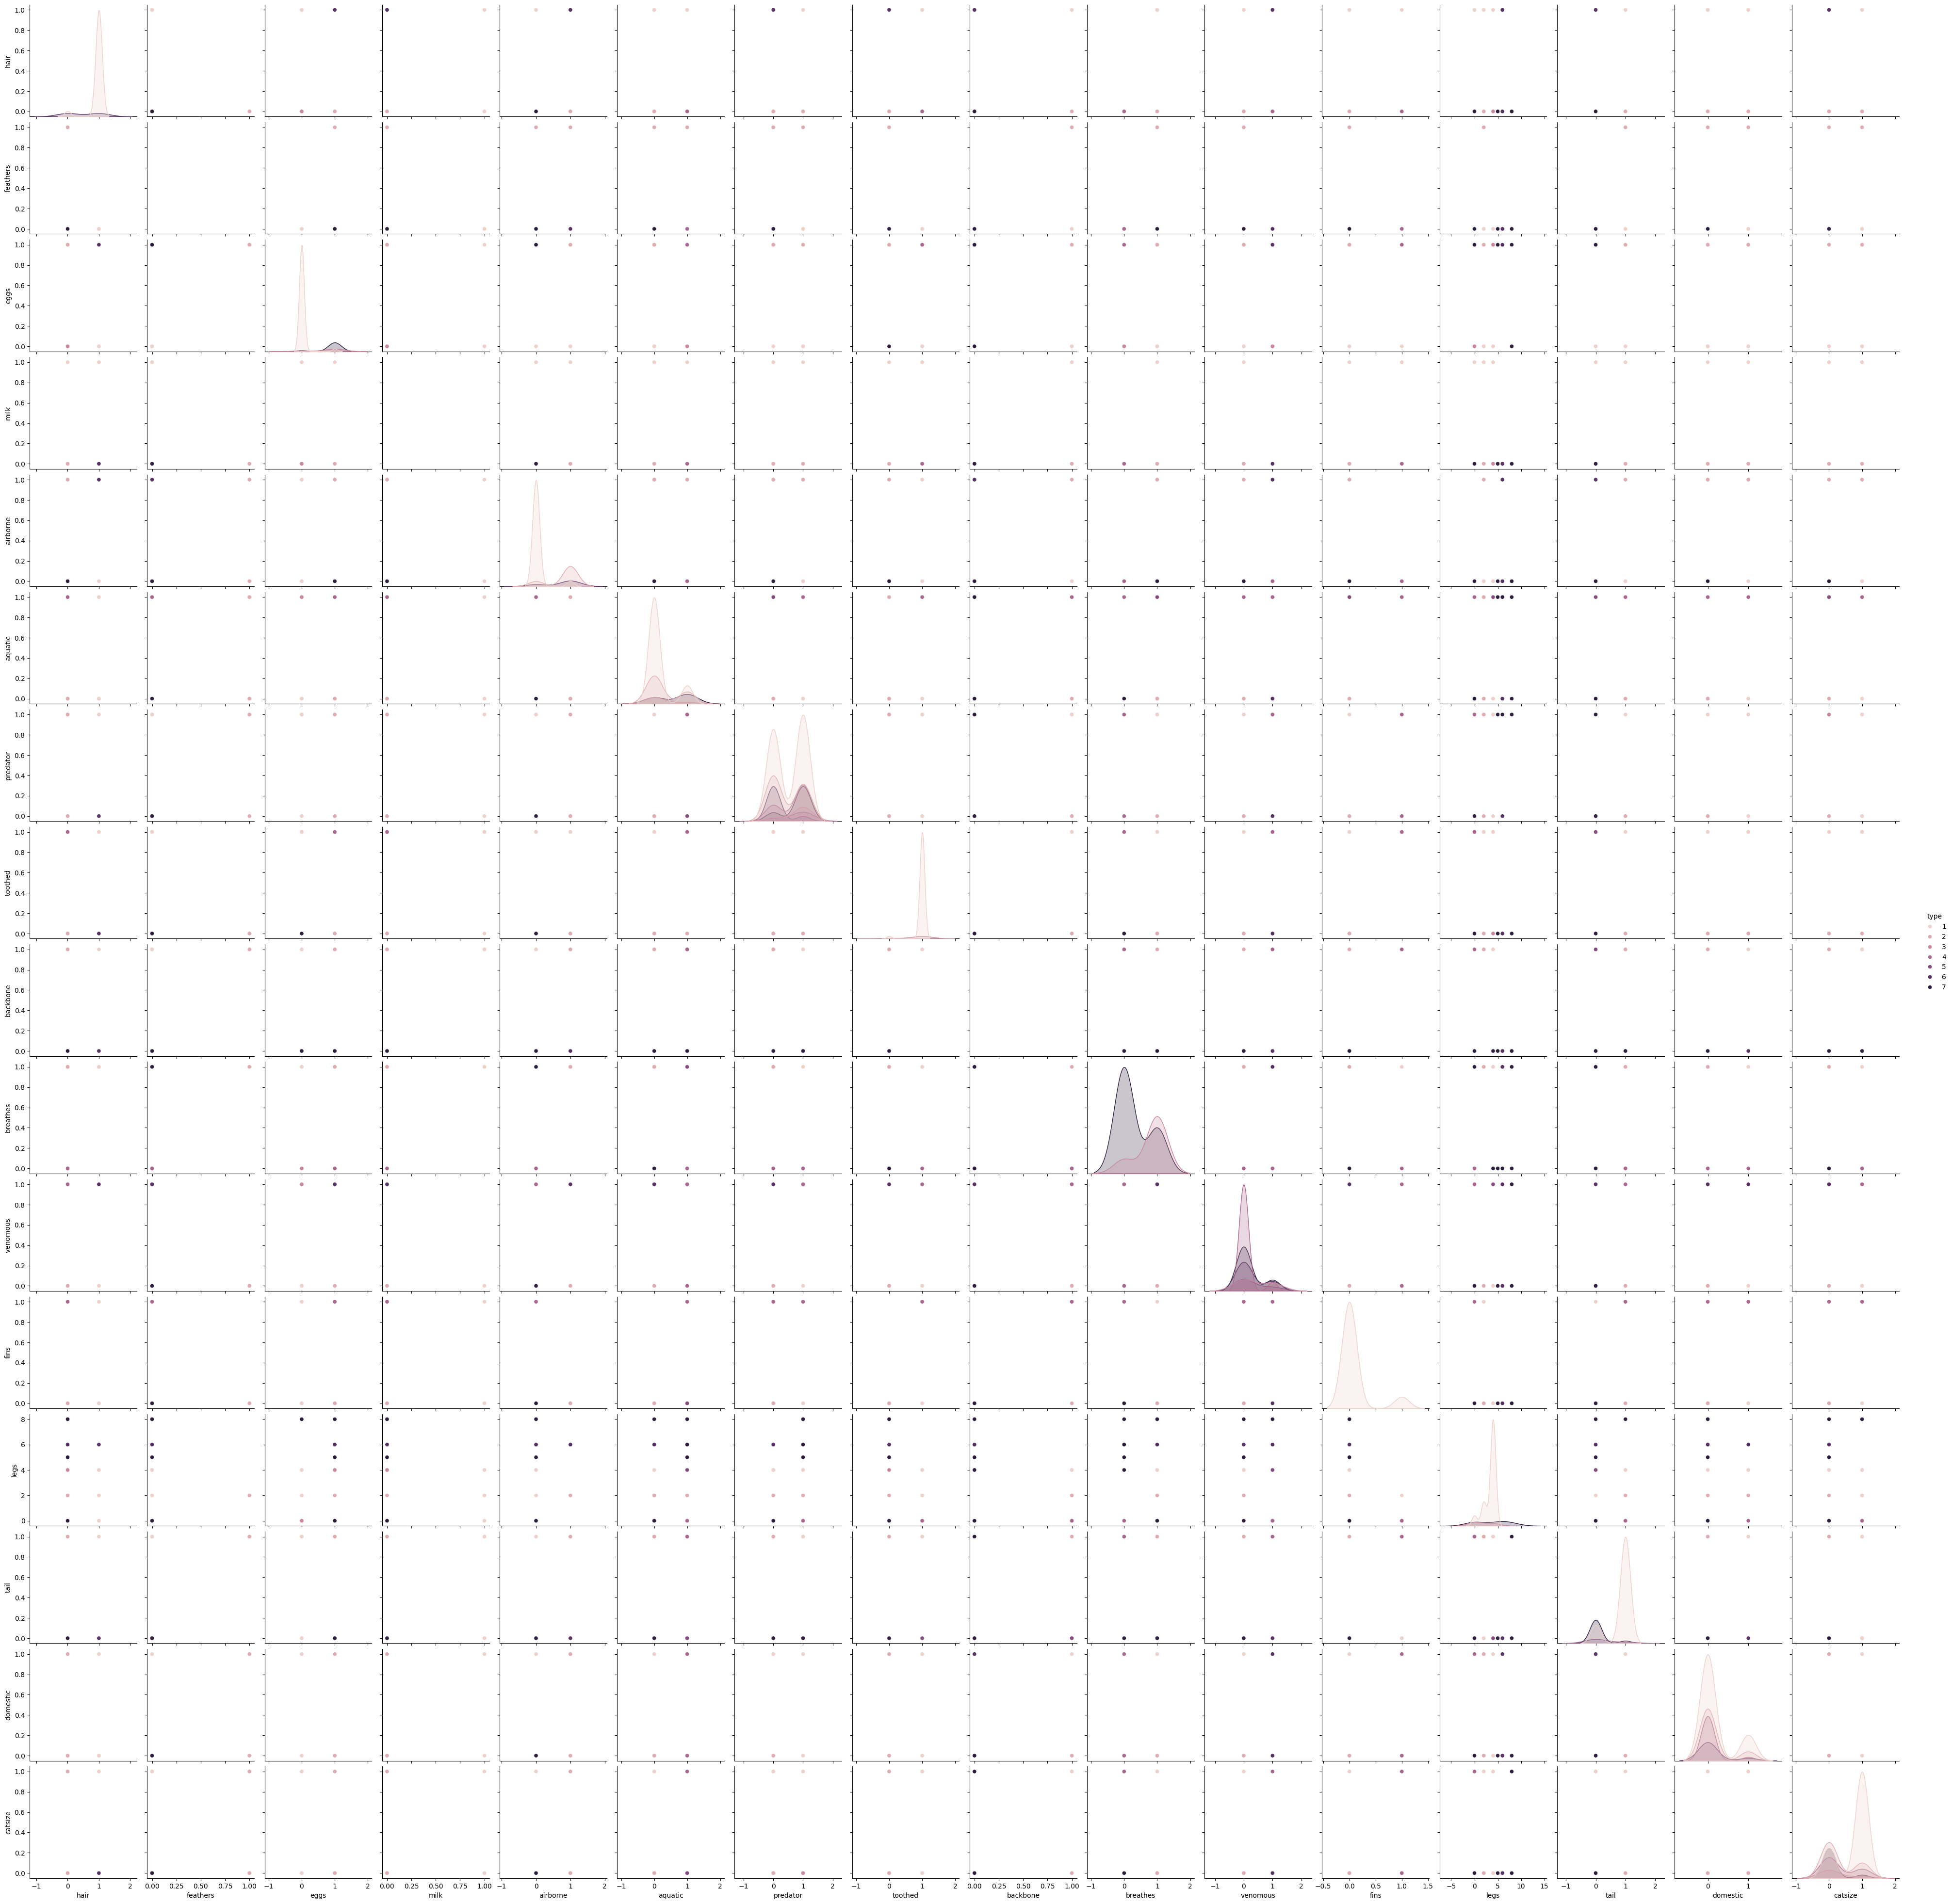

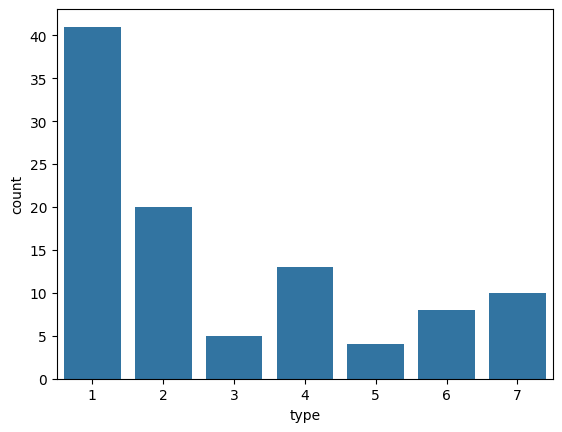

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Zoo.csv')

# Display the first few rows of the dataset
print(data.head())

# Pairplot to visualize relationships between features
sns.pairplot(data, hue='type')  # Changed 'animal_type' to 'type
plt.show()

# Count plot for the target variable
sns.countplot(x='type', data=data) # Changed 'animal_type' to 'type'
plt.show()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


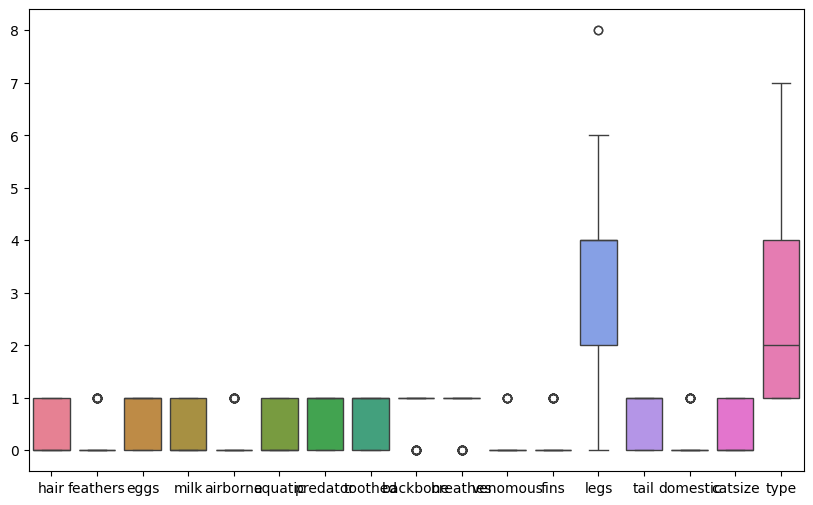

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (if any)
# Exclude non-numeric columns before calculating the mean
data.fillna(data.select_dtypes(include=['number']).mean(), inplace=True)

# Check for outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.show()

# Remove outliers based on z-score if necessary
from scipy import stats

# Select only numeric columns for z-score calculation
z_scores = stats.zscore(data.select_dtypes(include=[float, int]))
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'animal name' is the target variable
X = data.drop('animal name', axis=1) # Changed 'animal_type' to 'animal name'
y = data['animal name'] # Changed 'animal_type' to 'animal name'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Choosing K=5 as an example

# Fit the classifier on the training data
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Choosing K=5 as an example

# Fit the classifier on the training data
knn.fit(X_train, y_train)

# Using GridSearchCV to find the best K and distance metric
param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Use KFold instead of StratifiedKFold
from sklearn.model_selection import KFold
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=KFold(n_splits=5))
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 1}


In [ ]:
# Using GridSearchCV to find the best K and distance metric
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Use KFold instead of StratifiedKFold
from sklearn.model_selection import KFold
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=KFold(n_splits=5)) # Changed cv to KFold
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 1}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict on the testing set
y_pred = knn.predict(X_test)

# Evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='macro'):.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.00
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
              precision    recall  f1-score   support

    aardvark       0.00      0.00      0.00       1.0
    antelope       0.00      0.00      0.00       0.0
        bass       0.00      0.00      0.00       0.0
        bear       0.00      0.00      0.00       0.0
        boar       0.00      0.00      0.00       1.0
        calf       0.00      0.00      0.00       0.0
     catfish       0.00      0.00      0.00       0.0
     cheetah       0.00      0.00      0.00       1.0
     chicken       0.00      0.00      0.00       0.0
        chub       0.00      0.00      0.00       1.0
        crab       0.00      0.00      0.00       0.0
    crayfish       0.00      0.00      0.00       0.0
        crow       0.00      0.00      0.00       0.0
        deer       0.00      0.00      0.00       0.0
     dogfish       0.00      0.00      0.00       1.0
    elephant       0.00      0.00      0.00       1.0
    flamingo       0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWa

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


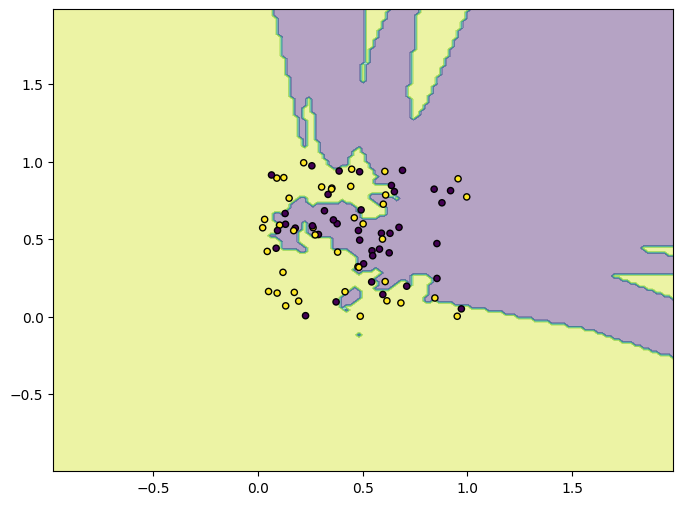

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # Import Matplotlib for plotting

# Sample data creation since no data was provided
X = pd.DataFrame({'feature1': np.random.rand(100), 'feature2': np.random.rand(100)})
y = pd.Series(np.random.randint(0, 2, 100))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Choosing K=5 as an example

# Fit the classifier on the training data
knn.fit(X_train, y_train)

# Visualize decision boundary
def plot_decision_boundaries(X, y, model):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.show()

# Assuming two features for visualization
plot_decision_boundaries(X_train.values, y_train.values, knn)

Interview Questions
1. What are the key hyperparameters in KNN?

The key hyperparameters in KNN are the number of neighbors (K), the distance metric (metric), and the algorithm used to compute the nearest neighbors (algorithm).
2. What distance metrics can be used in KNN?

Common distance metrics used in KNN include Euclidean distance, Manhattan distance, Minkowski distance, and Hamming distance.